In [48]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import calendar


#headers for API response
headers = {
    'authority': 'dvlzjowx88.execute-api.us-west-2.amazonaws.com',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="96", "Google Chrome";v="96"',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36',
    'sec-ch-ua-platform': '"macOS"',
    'accept': '*/*',
    'origin': 'https://s3.us-east-2.amazonaws.com',
    'sec-fetch-site': 'cross-site',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://s3.us-east-2.amazonaws.com/',
    'accept-language': 'en-US,en;q=0.9',
}

#response with all the data
response = requests.get('https://dvlzjowx88.execute-api.us-west-2.amazonaws.com/h2now/all-branches/bacteria/latest', headers=headers)
db = response.json()

#parsing data into the different river branches
Northbranch = db["data"]["dataModel"]["data"][0]["values"]
Southbranch = db["data"]["dataModel"]["data"][1]["values"]
MainStem = db["data"]["dataModel"]["data"][2]["values"]
nbdata = pd.DataFrame(columns = ["datetime", "ppm"])
sbdata = pd.DataFrame(columns = ["datetime", "ppm"])
msdata = pd.DataFrame(columns = ["datetime", "ppm"])


#input strig with datime data
def getDateTime(timesamp):
    year = int(timesamp.split("-")[0])
    month = int(timesamp.split("-")[1])
    day = int(timesamp.split("-")[2].split("T")[0])
    hour = int(timesamp.split("-")[2].split("T")[1].split(":")[0])
    minute = int(timesamp.split("-")[2].split("T")[1].split(":")[1])
    second = int(timesamp.split("-")[2].split("T")[1].split(":")[2].split(".")[0])    
    return datetime(year, month, day, hour, minute, second)

#gets the datetime stamp for each datapoint 
for i in range(len(Northbranch)):
    nbdata = nbdata.append({"datetime": getDateTime(Northbranch[i]["timeOfSample"]) , "ppm": Northbranch[i]["value"]}, ignore_index=True)
    
for k in range(len(Southbranch)):
    sbdata = sbdata.append({"datetime": getDateTime(Southbranch[k]["timeOfSample"]) , "ppm": Southbranch[k]["value"]}, ignore_index=True)
    
    
for k in range(len(MainStem)):
     msdata = msdata.append({"datetime": getDateTime(MainStem[k]["timeOfSample"]), "ppm": MainStem[k]["value"]}, ignore_index= True)

### Ploting Pollution Levels for each river

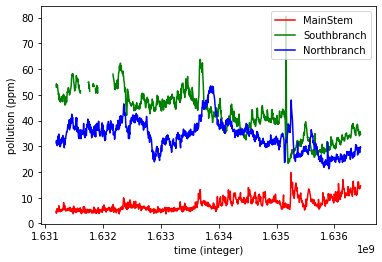

In [49]:
#mainstem data
y = list(msdata["ppm"])
x = list(msdata["datetime"])
x = [calendar.timegm(i.timetuple()) for i in x]

#northbranch data
r = list(nbdata["ppm"])
s = list(nbdata["datetime"])
s = [calendar.timegm(i.timetuple()) for i in s]

#southbranch data

t = list(sbdata["ppm"])
u = list(sbdata["datetime"])
u = [calendar.timegm(i.timetuple()) for i in u]


plot = plt.plot(x,y, "red")
plot = plt.plot(s,r, "green")
plot = plt.plot(u,t, "blue")
plt.xlabel("time (integer)")
plt.ylabel("pollution (ppm)")
plt.legend(["MainStem", "Southbranch", "Northbranch"], loc ="upper right")
plot


### This Section Uses Machine Learning to predict the future pollution of the river 

In [113]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# fix random seed for reproducibility
np.random.seed(7)
thedata = list(nbdata["ppm"])


# prepare the dataset of input to output as sequence input to float output
seq_length = 4
dataX = []
dataY = []
for i in range(0, len(thedata) - seq_length, 1):
    seq_in = thedata[i:i + seq_length]
    seq_out = thedata[i + seq_length]
    dataX.append([seq_in])
    dataY.append([seq_out])
    
#splits the data into parts for training and parts for testing
percenttrain = 0.75 #the fractional amount of data that will be used for training

trainXp = dataX[0:int(0.75*len(dataX))]
testXp = dataX[int(0.75*len(dataX)): (len(dataX))]
   
trainYp = dataY[0:int(0.75*len(dataY))]
testYp = dataY[int(0.75*len(dataY)): (len(dataY))]
    
trainX = []
trainY = []

#remove NAN from the training data
for i in range(len(trainXp)):
    if True in np.isnan(trainXp[i]) or True in np.isnan(trainYp[i]):
        pass
    else:
        trainX.append(trainXp[i])
        trainY.append(trainYp[i])

#remove NAN from the testing data
testX = []
testY  = []
for i in range(len(testXp)):
    if True in np.isnan(testXp[i]) or True in np.isnan(testYp[i]):
        pass
    else:
        testX.append(testXp[i])
        testY.append(testYp[i])
        
# reshape X to be [samples, time steps, features]
X = numpy.reshape(testX, (len(testX), 1, seq_length))
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# create and fit the model





# model = Sequential()
# model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
# model.add(Dense(y.shape[1], activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X, y, epochs=500, batch_size=1, verbose=2)






# # summarize performance of the model
# scores = model.evaluate(X, y, verbose=0)
# print("Model Accuracy: %.2f%%" % (scores[1]*100))
# # demonstrate some model predictions
# for pattern in dataX:
#     x = numpy.reshape(pattern, (1, 1, len(pattern)))
#     x = x / float(len(alphabet))
#     prediction = model.predict(x, verbose=0)
#     index = numpy.argmax(prediction)
#     result = int_to_char[index]
#     seq_in = [int_to_char[value] for value in pattern]
#     print(seq_in, "->", result)
    
    
    

    
    
    

the length of testXp is 233
the lenght of testYp is 233
the length of testX is 233
the lenght of testY is 233


In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
# fix random seed for reproducibility
numpy.random.seed(7)
# define the raw dataset
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
# create mapping of characters to integers (0-25) and the reverse
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# prepare the dataset of input to output pairs encoded as integers
seq_length = 3
dataX = []
dataY = []
for i in range(0, len(alphabet) - seq_length, 1):
	seq_in = alphabet[i:i + seq_length]
	seq_out = alphabet[i + seq_length]
	dataX.append([seq_in])
	dataY.append([seq_out])
	print(seq_in, '->', seq_out)

# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (len(dataX), 1, seq_length))
# normalize
X = X / float(len(alphabet))
# one hot encode the output variable
y = np_utils.to_categorical(dataY)


# create and fit the model
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=1, verbose=2)
# summarize performance of the model
scores = model.evaluate(X, y, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1]*100))
# demonstrate some model predictions
for pattern in dataX:
	x = numpy.reshape(pattern, (1, 1, len(pattern)))
	x = x / float(len(alphabet))
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	print(seq_in, "->", result)